In [201]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# -----------------------------
# 1. Import Libraries
# -----------------------------

In [202]:
##This project analyzes telecom data to predict customer churn using machine learning.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings("ignore")


# -----------------------------
# 2. Load Dataset
# -----------------------------

In [ ]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# -----------------------------
# 3. Initial Data Inspection and EDA
# -----------------------------

In this section, we explore patterns, trends, and relationships in the data to better understand customer churn behavior.

In [204]:
print("Shape:", df.shape)
df.info()
df.describe()
df['Churn'].value_counts(normalize=True)

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

### Churn Distribution (Target Imbalance)

Understanding the proportion of churners vs. non-churners helps us detect class imbalance, which is important for model selection and evaluation.

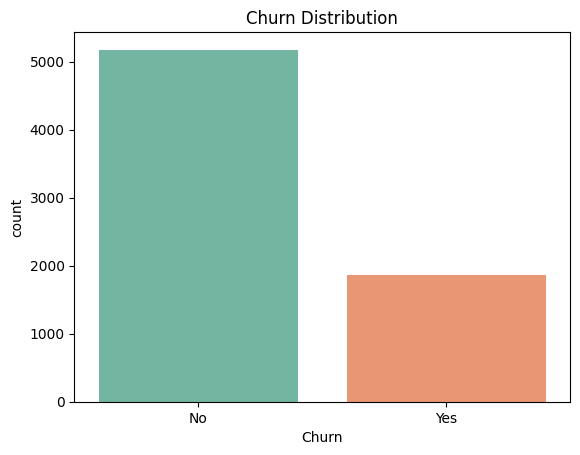

In [205]:
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.show()

Clearly shows class imbalance

### Churn by Contract Type / Internet Service / Payment Method

Customers with month-to-month contracts are more likely to churn than those with annual or two-year contracts.
Long-term contracts help reduce churn.

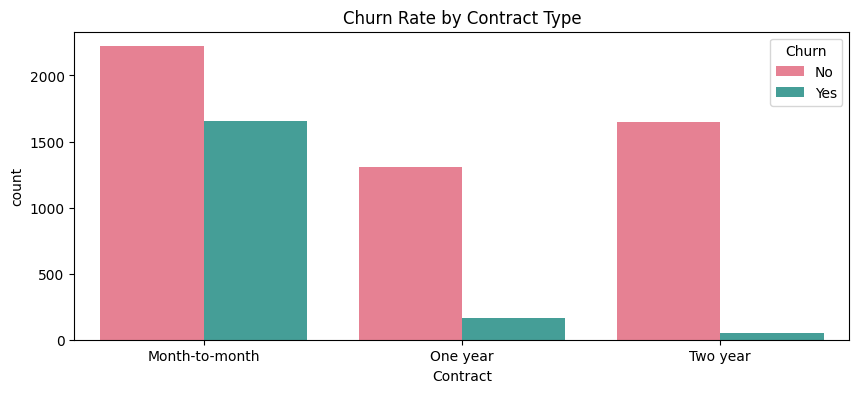

In [206]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='husl')
plt.title('Churn Rate by Contract Type')
plt.show()

The next one reveals whether the type of internet service (DSL, Fiber Optic, None) has any impact on churn.

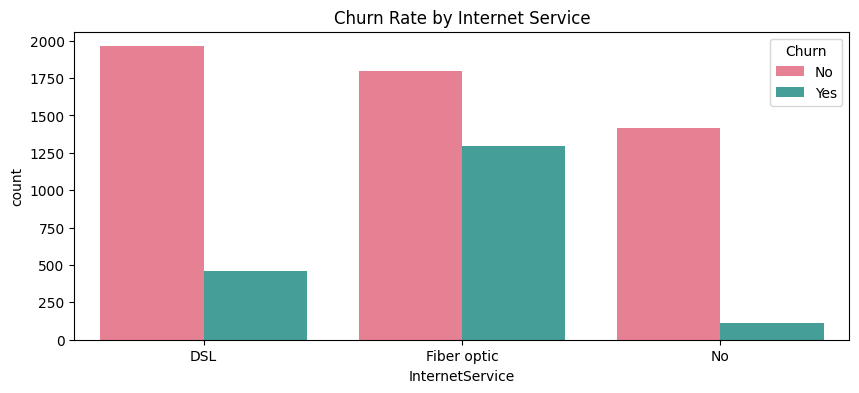

In [207]:
plt.figure(figsize=(10, 4))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='husl')
plt.title('Churn Rate by Internet Service')
plt.show()

Customers using fiber optic may churn more due to cost or performance concerns.

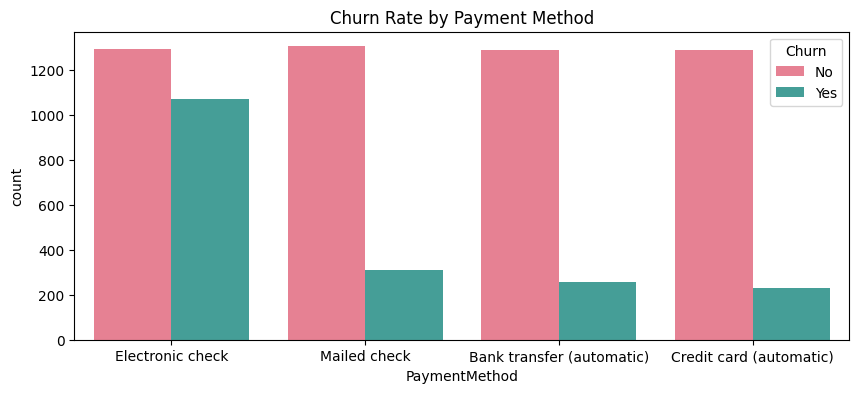

In [208]:
plt.figure(figsize=(10, 4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='husl')
plt.title('Churn Rate by Payment Method')
plt.show()

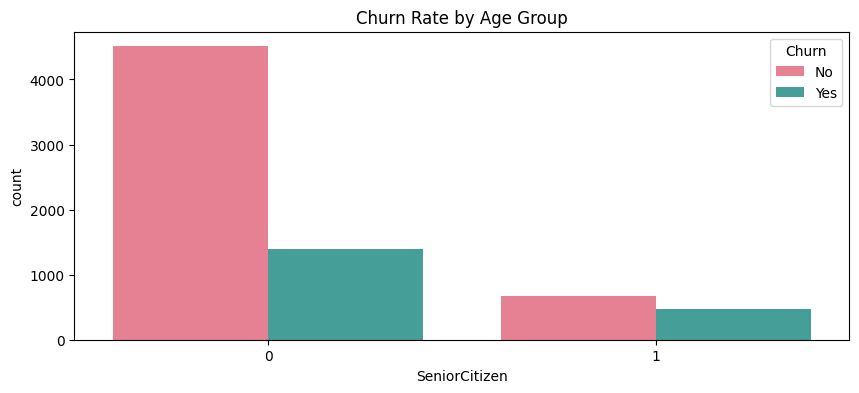

In [209]:
plt.figure(figsize=(10, 4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='husl')
plt.title('Churn Rate by Age Group')
plt.show()

### Monthly Charges Distribution by Churn

Let's compare the distribution of monthly charges for churned and retained customers.

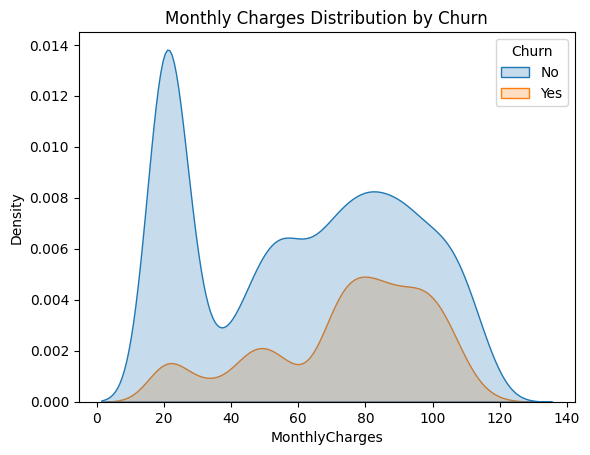

In [210]:
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

Churners tend to have higher monthly charges on average.

##  Tenure Distribution by Churn


This plot shows how long customers who churned had been with the company.

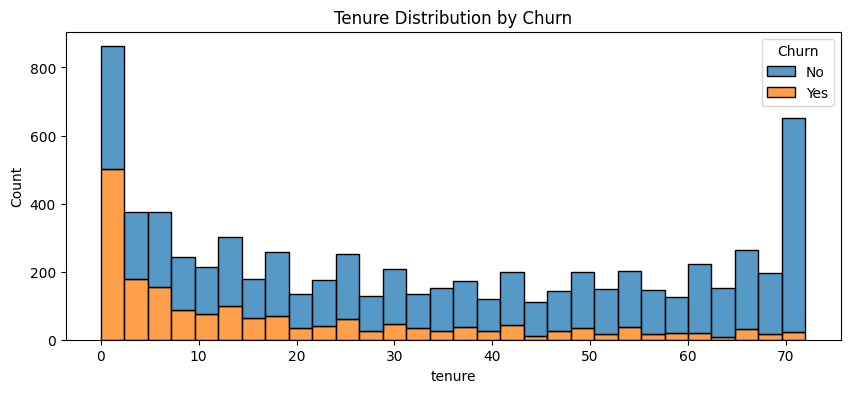

In [211]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()

Lower tenure often indicates higher churn.
Newer customers are more likely to churn — tenure is negatively correlated with churn.

##  Boxplot of Charges vs. Churn

Next one reveal distribution, median, and outliers in numeric features.

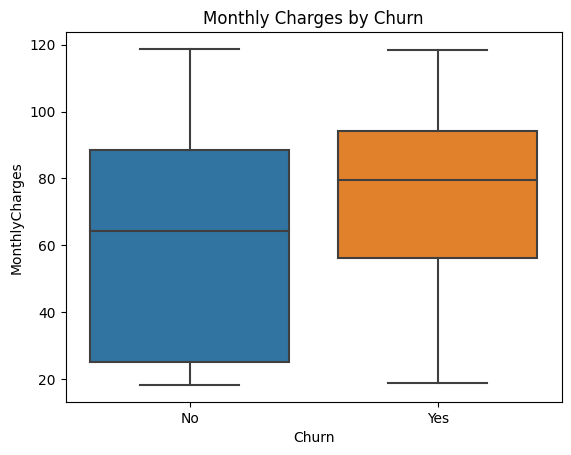

In [212]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

## Interactivity

In [213]:
import plotly.express as px

fig = px.histogram(df, x="tenure", color="Churn", barmode="overlay", nbins=30)
fig.update_layout(title="Tenure Distribution by Churn")
fig.show()

### To Summarize:

Churn is imbalanced, requiring techniques like SMOTE for model training.

Contract type, tenure, and charges are strongly associated with churn behavior.

Short-term users and high-paying customers are more likely to churn.

Some features are correlated (e.g., TotalCharges and tenure), but this is acceptable for tree-based models.

# -----------------------------
# 4. Data Cleaning
# -----------------------------

In [214]:
# Remove customerID
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (has some non-numeric entries)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
print(df.isnull().sum())

# Drop missing rows
df.dropna(inplace=True)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# -----------------------------
# 5. Encode Categorical Variables
# -----------------------------

In [ ]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Churn')  # We'll encode target separately

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
print(cat_cols)

# -----------------------------
# Let's see correlation matrix
# -----------------------------

Lets also focus on Target Variable (Churn)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only select numerical columns for correlation
numeric_features = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_features.corr()

# Display correlation matrix
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Correlation of all features with the target
target_corr = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlation with Churn:\n", target_corr)

In [ ]:
# Look for high correlation between features
corr_features = df[['MonthlyCharges', 'TotalCharges', 'tenure']].corr()
sns.heatmap(corr_features, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# -----------------------------
# 6. Train-Test Split
# -----------------------------

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 7. Scaling
# -----------------------------

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# 8. Modeling – Logistic Regression
# -----------------------------

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_pred_log))

# -----------------------------
# 9. Modeling – Random Forest
# -----------------------------

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))

# -----------------------------
# 10. Feature Importance
# -----------------------------

Feature Importance Analysis
To understand which features the model relies on most, we visualized the top 10 features based on their importance scores as calculated by the tree-based model (Random Forest or XGBoost). This helps us interpret the model and validate whether our most correlated features are actually influential in predictions.

In [ ]:
importances = rf_model.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).head(10).plot(
    x='Feature', y='Importance', kind='barh', figsize=(8, 6), title='Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

This plot confirms which features contribute most to predicting customer churn. Notably, even though TotalCharges and tenure are highly correlated (0.83), both may appear among the most important features. Since we're using a tree-based model (which handles multicollinearity well), we chose to retain both features.

Although TotalCharges and tenure are highly correlated (0.83), both are retained since tree-based models are not sensitive to multicollinearity.

# -----------------------------
# 11. Trying xgboost (to compare)
# -----------------------------

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
}

grid = GridSearchCV(xgb, params, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

best_model = grid.best_estimator_
y_pred_xgb = best_model.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgb))

In [ ]:
#Interpreting the Model (with SHAP that explains which features push a prediction higher or lower.)
import shap

# SHAP requires original (non-scaled) input features
X_sample = pd.DataFrame(X_test, columns=X.columns).sample(100, random_state=42)

explainer = shap.Explainer(best_model)
shap_values = explainer(X_sample)

shap.plots.beeswarm(shap_values)


In [ ]:
shap.plots.bar(shap_values)

In [ ]:
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0

In [ ]:
from imblearn.over_sampling import SMOTE
# Train-test split (you already have this)
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Apply SMOTE on scaled training data
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

# Check new class balance
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_bal).value_counts())


#retrain
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_bal, y_train_bal)

# Predict on original test set (not oversampled!)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# -----------------------------
# 💡 Conclusion
# -----------------------------
## 📌 Final Insights Summary

### 🔍 What Features Most Affect Churn?

Using feature importance from the tuned XGBoost model and correlation analysis, the most influential factors contributing to customer churn are:

- **Tenure** (negatively correlated): Customers with shorter tenure are much more likely to churn.
- **MonthlyCharges**: Higher monthly bills are associated with increased churn risk.
- **Contract Type**: Month-to-month contracts have significantly higher churn compared to long-term contracts.
- **TotalCharges**: Closely related to tenure — customers with low total charges (newer customers) are more likely to churn.
- **InternetService** and **PaymentMethod** also play a role in customer churn likelihood.

SHAP values and model insights confirm that tenure, contract type, and monthly charges are the most critical predictors.

---

### 📈 How Accurate Are the Models?

#### ✅ Final Tuned XGBoost (with SMOTE):

- **Accuracy**: 80%
- **Precision (Churn)**: 66%
- **Recall (Churn)**: 51%
- **F1-Score (Churn)**: 0.57
- **ROC AUC**: 0.71

#### 🔄 Previous Model (with SMOTE, before tuning):

- **Accuracy**: 76%
- **Recall (Churn)**: 57%
- **ROC AUC**: 0.70

> 📊 **Conclusion**: Hyperparameter tuning improved overall accuracy and AUC, while slightly balancing precision and recall for the churn class.

---

### 💡 What Might the Company Do to Reduce Churn?

Based on model insights and customer patterns, the company should consider the following actions to proactively reduce churn:

- 🔁 **Promote long-term contracts**: Encourage customers to switch from month-to-month to annual or two-year contracts through discounts or loyalty perks.
- 🧠 **Target newer customers** (low tenure, low TotalCharges) with onboarding support, follow-ups, or special offers in the first few months.
- 💰 **Offer personalized pricing options**: Consider bundling or flexible plans for customers with high MonthlyCharges, especially if they’re also on month-to-month contracts.
- 📡 **Evaluate Fiber Optic users**: If these users are churning more, investigate service issues or satisfaction concerns.
- 🤖 **Use the trained model** in customer service systems to flag high-risk users and trigger automated or human outreach.

---

By using predictive modeling combined with strategic interventions, the company can **retain valuable customers**, improve satisfaction, and reduce churn over time.


In [ ]:
pip install streamlit